<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
找不到文件

img = plt.imread('iris.jpg')
plt.figure(figsize=(6,3))
plt.imshow(img)
'''

"\n找不到文件\n\nimg = plt.imread('iris.jpg')\nplt.figure(figsize=(6,3))\nplt.imshow(img)\n"

In [3]:
iris = load_iris()
print(iris.keys(), "\n") # 数据集的对象属性
print(iris.data.shape, "\n") # 维度信息
print(iris.feature_names, "\n") # 特征名称
print(iris['target_names'], "\n") # 分类名称
print(iris['target'], "\n") # 分类值

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

(150, 4) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

['setosa' 'versicolor' 'virginica'] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 



将数据存入DataFream中

In [4]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# 显示前5行
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


添加分类属性

In [5]:
iris_df['label'] = iris.target
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(iris_df['label'].value_counts())

2    50
1    50
0    50
Name: label, dtype: int64


显示 2 分类数据集（为便于可视化，只选取前 2 列数据，即花萼长度与宽度属性数据，并且只选取前 100 条记录，即 0 与 1 分类）

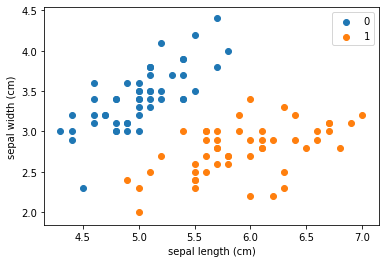

In [7]:
plt.scatter(iris_df[:50]['sepal length (cm)'], iris_df[:50]['sepal width (cm)'], label='0')
plt.scatter(iris_df[50:100]['sepal length (cm)'], iris_df[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

In [8]:
# 取出第 0 、 1 、最后一列 ， 前100 条记录
# X 为前两列，作为其训练数据
# Y 作为标签， 其标准化了1， -1 输出
data = np.array(iris_df.iloc[:100, [0, 1, -1]])
X, Y= data[:, :-1],data[:, -1]
Y = np.array([1 if y == 0 else -1 for y in Y])

data


array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ],
       [5.4, 3.9, 0. ],
       [4.6, 3.4, 0. ],
       [5. , 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [4.9, 3.1, 0. ],
       [5.4, 3.7, 0. ],
       [4.8, 3.4, 0. ],
       [4.8, 3. , 0. ],
       [4.3, 3. , 0. ],
       [5.8, 4. , 0. ],
       [5.7, 4.4, 0. ],
       [5.4, 3.9, 0. ],
       [5.1, 3.5, 0. ],
       [5.7, 3.8, 0. ],
       [5.1, 3.8, 0. ],
       [5.4, 3.4, 0. ],
       [5.1, 3.7, 0. ],
       [4.6, 3.6, 0. ],
       [5.1, 3.3, 0. ],
       [4.8, 3.4, 0. ],
       [5. , 3. , 0. ],
       [5. , 3.4, 0. ],
       [5.2, 3.5, 0. ],
       [5.2, 3.4, 0. ],
       [4.7, 3.2, 0. ],
       [4.8, 3.1, 0. ],
       [5.4, 3.4, 0. ],
       [5.2, 4.1, 0. ],
       [5.5, 4.2, 0. ],
       [4.9, 3.1, 0. ],
       [5. , 3.2, 0. ],
       [5.5, 3.5, 0. ],
       [4.9, 3.6, 0. ],
       [4.4, 3. , 0. ],
       [5.1, 3.4, 0. ],
       [5. , 3.5, 0. ],
       [4.5, 2.3

In [9]:
# 使用了对偶问题的求解
class Perceptron:
    def __init__(self):
        self.alpha = 0.05
        self.paras = []
        
    def w_x_b(self, x):
        return np.dot(self.W, x) + self.b
    
    def fit(self, X, Y):
        self.W = np.ones(X.shape[1], dtype = np.float32)
        self.b = -5
        x0_mean = np.mean(X[0])
        x1_mean = np.mean(X[1])
        self.W[0] = x1_mean / x0_mean
        print(self.W, self.b)
        
        finish = False
        count = 0
        while not finish :
            count = count + 1
            finish = True
            for index in range(len(X)):
                x = X[index]
                y = Y[index]
                if y * self.w_x_b(x) <= 0:
                    self.W = self.W + self.alpha * y * x
                    self.b = self.b + self.alpha * y
                    finish = False
                    
                    self.paras.append((self.W, self.b))
            if finish :
                print("count = ", count)
                return 'Perceptron training completed!'

使用训练集训练模型

In [10]:
np.random.seed()
model = Perceptron()
model.fit(X, Y)

[0.9186047 1.       ] -5
count =  859


'Perceptron training completed!'

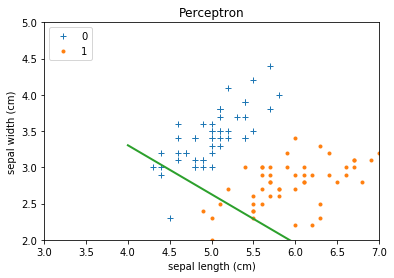

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

fig = plt.figure()
ax = plt.axes(xlim =(3, 7), ylim=(2, 5))

ax.plot(data[:50, 0], data[:50, 1], '+', label = '0')
ax.plot(data[50:100, 0], data[50:100, 1], '.', label = '1')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Perceptron')
ax.legend(loc = 'upper left')

line,  = ax.plot([], [], lw = 2)
def update(para):
    W = para[0]
    b = para[1]
    
    X_points = np.linspace(4, 7, 10)
    Y_points = -(W[0] * X_points + b) / W[1]
    line.set_data(X_points, Y_points)
ani = animation.FuncAnimation(fig, update, model.paras)

HTML(ani.to_html5_video())

ani.save('Fitting-Peak.mp4')

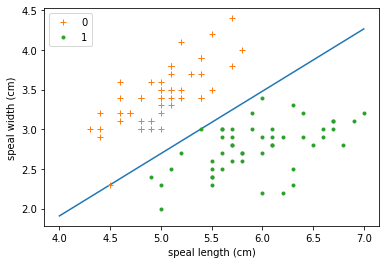

In [12]:
%matplotlib inline 
X_points = np.linspace(4, 7, 10)
Y_points = -(model.W[0] * X_points + model.b) / model.W[1]
plt.plot(X_points, Y_points)

plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:200, 1], '.', label='1')
plt.xlabel('speal length (cm)')
plt.ylabel('speal width (cm)')
plt.legend()

In [13]:
from sklearn.linear_model import Perceptron

np.random.seed()

In [14]:
model = Perceptron(max_iter = 1000, tol=None)
model.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

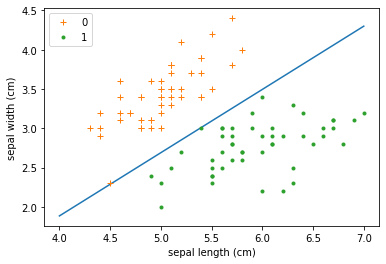

In [15]:
%matplotlib inline 
X_points = np.linspace(4, 7,10)
Y_points = -(model.coef_[0][0] * X_points + model.intercept_)/model.coef_[0][1]
plt.plot(X_points, Y_points)
plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()